<a href="https://colab.research.google.com/github/mirza019/Sentiment-Analysis-using-Bidirectional-Encoder-Representations-from-Transformers-BERT-/blob/main/sentiment_analysis_using_bidirectional_encoder_representations_from_transformers__bert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#  Let’s get the latest NLP tools!
!pip install -q transformers rich matplotlib seaborn


In [ ]:
import tensorflow as tf
import os
import tarfile

# 🗃️ Download and extract IMDB dataset (Stanford)
dataset_path = tf.keras.utils.get_file(
    "aclImdb_v1.tar.gz",
    "http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz",
    extract=True
)

extract_folder = os.path.join(os.path.dirname(dataset_path), "aclImdb_v1_extracted")
if not os.path.exists(extract_folder):
    with tarfile.open(dataset_path, "r:gz") as tar:
        tar.extractall(os.path.dirname(dataset_path))
IMDB_DATADIR = os.path.join(extract_folder, "aclImdb")

print(f"✅ Data available at: {IMDB_DATADIR}")


84125825/84125825 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step
✅ Data available at: /root/.keras/datasets/aclImdb_v1_extracted/aclImdb


In [ ]:
from tqdm.auto import tqdm
import glob

def load_imdb_data(data_dir, subset):
    texts, labels = [], []
    for label in ['pos', 'neg']:
        folder = os.path.join(data_dir, subset, label)
        files = glob.glob(os.path.join(folder, '*.txt'))
        for filename in tqdm(files, desc=f"Loading {label} {subset}"):
            with open(filename, encoding='utf-8') as f:
                texts.append(f.read())
            labels.append(1 if label == 'pos' else 0)
    return texts, labels

train_texts, train_labels = load_imdb_data(IMDB_DATADIR, 'train')
test_texts, test_labels = load_imdb_data(IMDB_DATADIR, 'test')

print(f"🎬 Loaded {len(train_texts)} training and {len(test_texts)} test samples.")


Loading pos train:   0%|          | 0/12500 [00:00<?, ?it/s]

Loading neg train:   0%|          | 0/12500 [00:00<?, ?it/s]

Loading pos test:   0%|          | 0/12500 [00:00<?, ?it/s]

Loading neg test:   0%|          | 0/12500 [00:00<?, ?it/s]

🎬 Loaded 25000 training and 25000 test samples.


In [ ]:
import random
from rich import print

idx = random.randint(0, len(test_texts)-1)
print(f"[bold blue]Sample Review:[/bold blue] {test_texts[idx][:200]}...\n[bold green]Label:[/bold green] {'Positive' if test_labels[idx] else 'Negative'}")


Sample Review: Wow, what a strange film. It's a David Lynch movie so it's no surprise that it is weird. <br /><br 
/>I defy anyone to totally explain everything in this film. I can't be done. After some research foll...
Label: Positive

In [ ]:
from transformers import pipeline

# ⚡️ Use a SOTA model fine-tuned for IMDB
sentiment_model = pipeline("sentiment-analysis", model="textattack/bert-base-uncased-imdb")

# Predict on 10 random test samples for demo
sample_indices = random.sample(range(len(test_texts)), 10)
sample_texts = [test_texts[i][:512] for i in sample_indices]
predictions = sentiment_model(sample_texts)

for i, (txt, pred) in enumerate(zip(sample_texts, predictions)):
    print(f"\n[bold]{i+1}. Review:[/bold] {txt[:100]}...")
    print(f"[bold yellow]Prediction:[/bold yellow] {pred['label']} | [bold cyan]Score:[/bold cyan] {pred['score']:.2f}")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/511 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


1. Review: This movie is excellent ( i watched the French version ). There are many subplots (which usually det...

Prediction: LABEL_1 | Score: 1.00

2. Review: There are two ways to regard 'Head'. Either it is a dazzling, mind-blowing collage of music, old fil...

Prediction: LABEL_1 | Score: 1.00

3. Review: I was looking through TV Guide last night and saw a movie starring Heather Grahm on, who I liked in ...

Prediction: LABEL_0 | Score: 1.00

4. Review: I felt that the movie Skammen, directed by Ingmar Bergman, was very dry. It shows the things people ...

Prediction: LABEL_0 | Score: 0.70

5. Review: I give this film 8/10 overall. Visually, a great deal of it is nothing short of stunning: an art dir...

Prediction: LABEL_1 | Score: 1.00

6. Review: This is a film that has garnered any interest or praise it has received simply on the merit of being...

Prediction: LABEL_0 | Score: 1.00

7. Review: I know this is a made for TV movie, and the acting in made for TV movies is usually sub-par, but it'...

Prediction: LABEL_0 | Score: 1.00

8. Review: I have to tell you I've been a fan of Star Trek TNG since i was a kid.<br /><br />Well, sometime ago...

Prediction: LABEL_1 | Score: 0.92

9. Review: "Hollywood Cavalcade" is a mildly entertaining 1939 film starring two staples of the 20th Century Fo...

Prediction: LABEL_0 | Score: 0.99

10. Review: This agreeably perverse and oddball early 80's teen body count flick may never reach the astonishing...

Prediction: LABEL_1 | Score: 1.00

/tmp/ipython-input-6-1658093474.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(labels, palette='viridis')


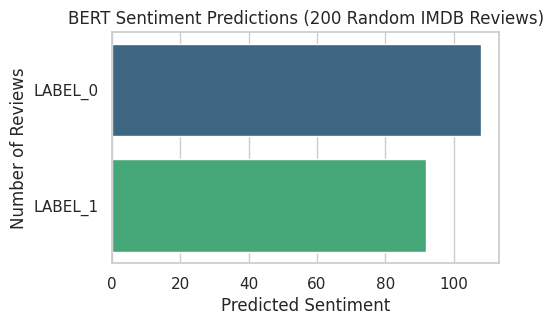

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on a larger sample for visualization
viz_sample = [text[:512] for text in random.sample(test_texts, 200)]
viz_preds = sentiment_model(viz_sample)
labels = [pred['label'] for pred in viz_preds]

sns.set_theme(style="whitegrid")
plt.figure(figsize=(5,3))
sns.countplot(labels, palette='viridis')
plt.title('BERT Sentiment Predictions (200 Random IMDB Reviews)')
plt.ylabel('Number of Reviews')
plt.xlabel('Predicted Sentiment')
plt.show()


In [ ]:
def check_sentiment(text):
    pred = sentiment_model(text[:512])[0]
    print(f"[bold blue]Text:[/bold blue] {text}")
    print(f"[bold yellow]Prediction:[/bold yellow] {pred['label']} | [bold cyan]Score:[/bold cyan] {pred['score']:.2f}")

# Try your own review!
check_sentiment("The direction and acting were truly inspiring!")
check_sentiment("I wouldn't recommend this movie to anyone.")


Text: The direction and acting were truly inspiring!

Prediction: LABEL_1 | Score: 1.00

Text: I wouldn't recommend this movie to anyone.

Prediction: LABEL_0 | Score: 1.00